# Works examples

Author: Romain THOMAS  
June 2023  
Stockholm Resilience Centre, Stockholm University

## Import the library

In [1]:
# Import the full library
from openalex_analysis.plot import InstitutionsPlot, WorksPlot

# If you only need the analysis methods, you can import them without the plot ones with:
from openalex_analysis.analysis import InstitutionsAnalysis, WorksAnalysis

## Basic case

### Works of a concept

In this example, we will analyse the works of sustainability and their references

#### Get the works

In [2]:
concept_sustainability_id = 'C66204764'

wplt = WorksPlot(concept_sustainability_id)

Loading dataframe of works of the concept C66204764
Loading the list of entities from a parquet file...


#### The works array

In [3]:
wplt.entities_df.head(3)

,id,doi,title,display_name,publication_year,publication_date,language,type,authorships,corresponding_author_ids,...,primary_location.source,best_oa_location.source,apc_list.value,apc_list.currency,apc_list.value_usd,apc_list.provenance,apc_paid.value,apc_paid.currency,apc_paid.value_usd,apc_paid.provenance
0,https://openalex.org/W2101946146,https://doi.org/10.1287/mnsc.35.12.1504,Asset Stock Accumulation and Sustainability of...,Asset Stock Accumulation and Sustainability of...,1989,1989-12-01,en,journal-article,[{'author': {'display_name': 'Ingemar Dierickx...,[],...,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,None
1,https://openalex.org/W1999167944,https://doi.org/10.1126/science.1259855,Planetary boundaries: Guiding human developmen...,Planetary boundaries: Guiding human developmen...,2015,2015-02-13,en,journal-article,"[{'author': {'display_name': 'Will Steffen', '...",[],...,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,None
2,https://openalex.org/W2122266551,https://doi.org/10.1038/nature01014,Agricultural sustainability and intensive prod...,Agricultural sustainability and intensive prod...,2002,2002-08-01,en,journal-article,"[{'author': {'display_name': 'David Tilman', '...",[https://openalex.org/A1985668519],...,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,None


#### Compute the most used references

In [4]:
wplt.create_element_used_count_array('reference')

Getting name of C66204764 from the OpenAlex API (cache disabled)...
Creating the works references count of works C66204764...


#### The reference count array

In [5]:
wplt.element_count_df.head(3)

,C66204764 Sustainability
element,
https://openalex.org/W2096885696,261
https://openalex.org/W2026816730,261
https://openalex.org/W2103847341,235


## Advanced cases

### Compare the works of a concept and of 2 institutions per year

#### Analysis

In this example, we will compare the works of concept (Sustainability) and the works of 2 institutions (SRC - Stockholm Resilience Centre and UTT - University of Technology of Troyes) year by year.  
The analysis will focus on the concept used by the works but it also work with the references used as in the previous example.

In [6]:
concept_sustainability_id = 'C66204764'
institution_src_id = 'I138595864'
institution_utt_id = 'I140494188'

# count per year from 2015 to 2023
count_years = list(range(2015, 2024))

# The filter needs to have the format from the OpenAlex API
sustainability_concept_filter = {"concepts": {"id": concept_sustainability_id}}

# Create a list of dictionary with each dictionary representing an institution
# The dictionary keys can be any parameter of the WorksConceptsAnalysis constructor
# In our example, we add an extra filter to get only the works about sustainability of each institution
entities_to_compare = [
    {'entitie_from_id': institution_src_id, 'extra_filters': sustainability_concept_filter,},
    {'entitie_from_id': institution_utt_id, 'extra_filters': sustainability_concept_filter,}
]

# We create instance with the concept of sustainability. In the analysis, the main entitie is
# the entitie given to the constructor if given, or the first entitie in the list given to the
# create_element_used_count_array() function
wplt = WorksPlot(concept_sustainability_id)

wplt.create_element_used_count_array('concept', entities_to_compare, count_years = count_years)

# We sort the entities in the statistics array by the most used. We can also sort them again later
# with sort_count_array()
# The minimum concept level will remove from the count array all the concept bellow, it's usefull if
# we want to keep only the more specific concepts in the array and remove the general ones (often of level 0 or 1)
wplt.add_statistics_to_element_count_array(sort_by = 'sum_all_entities', min_concept_level = 3)

wplt.element_count_df.to_csv("~/Downloads/testarray.csv")
wplt.element_count_df.head(20)

Loading dataframe of works of the concept C66204764
Loading the list of entities from a parquet file...
Getting name of C66204764 from the OpenAlex API (cache disabled)...
Creating the concept count of works C66204764...
Loading dataframe of works of the institution I138595864
Loading the list of entities from a parquet file...
Getting name of I138595864 from the OpenAlex API (cache disabled)...
Creating the concept count of works I138595864...
Loading dataframe of works of the institution I140494188
Loading the list of entities from a parquet file...
Getting name of I140494188 from the OpenAlex API (cache disabled)...
Creating the concept count of works I140494188...
Main entitie: C66204764 Sustainability
Computing sum_all_entities...
Computing proportion_used_by_main_entitie
fill with NaN values 0 of sum_all_entities to avoid them to be used when ranking (we wan't to ignore these rows as these references aren't used)
Computing sum_all_entities rank...
Computing proportion_used_by_mai

concept_name  concept_level   
element                         year                                         
https://openalex.org/C549605437 2015          Food security              3  \
                                2016          Food security              3   
                                2017          Food security              3   
                                2018          Food security              3   
                                2019          Food security              3   
                                2020          Food security              3   
                                2021          Food security              3   
                                2022          Food security              3   
                                2023          Food security              3   
https://openalex.org/C52407799  2015  Social sustainability              3   
                                2016  Social sustainability              3   
                                2017  Social sustainability              3   
                                2018  Social sustainability              3   
                                2019  Social sustainability              3   
                                2020  Social sustainability              3   
                                2021  Social sustainability              3   
                                2022  Social sustainability              3   
                                2023  Social sustainability              3   
https://openalex.org/C58941895  2015     Ecosystem services              3   
                                2016     Ecosystem services              3   

                                      C66204764 Sustainability   
element                         year                             
https://openalex.org/C549605437 2015                        37  \
                                2016                        33   
                                2017                        32   
                                2018                        30   
                                2019                        25   
                                2020                        19   
                                2021                        11   
                                2022                         0   
                                2023                         0   
https://openalex.org/C52407799  2015                        36   
                                2016                        26   
                                2017                        31   
                                2018                        30   
                                2019                        16   
                                2020                        14   
                                2021                         5   
                                2022                         0   
                                2023                         0   
https://openalex.org/C58941895  2015                        29   
                                2016                        26   

                                      I138595864 Stockholm Resilience Centre   
element                         year                                           
https://openalex.org/C549605437 2015                                       0  \
                                2016                                       1   
                                2017                                       2   
                                2018                                       6   
                                2019                                       8   
                                2020                                       5   
                                2021                                       7   
                                2022                                       7   
                                2023                                       2 

#### Plot

As we keep only the 10k most cited articles in each dataset, the selected articles for sustainability contains only 2% of them (~500k in total). As the recent articles are usually less cited than the older ones, we have less articles in the recent years.

The default plot plot the usage of the first concept in the dataframe

Getting name of C549605437 from the OpenAlex API (cache disabled)...


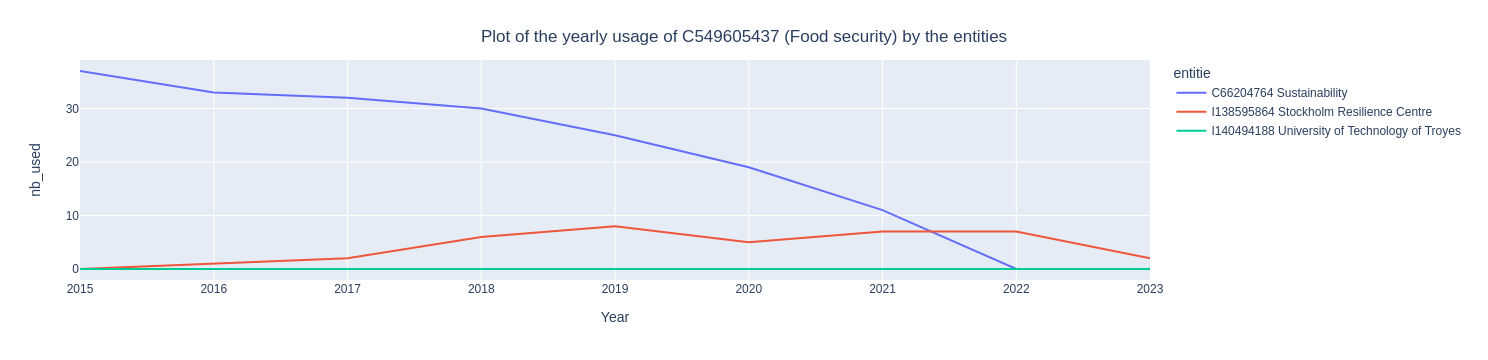

In [26]:
wplt.get_figure_time_series_element_used_by_entities()#.write_image("default_yearly_plot.pdf", width = 1000)

We can plot sum of usage by all and by SRC of the concept "Social sustainability" ('https://openalex.org/C52407799')

Getting name of C52407799 from the OpenAlex API (cache disabled)...


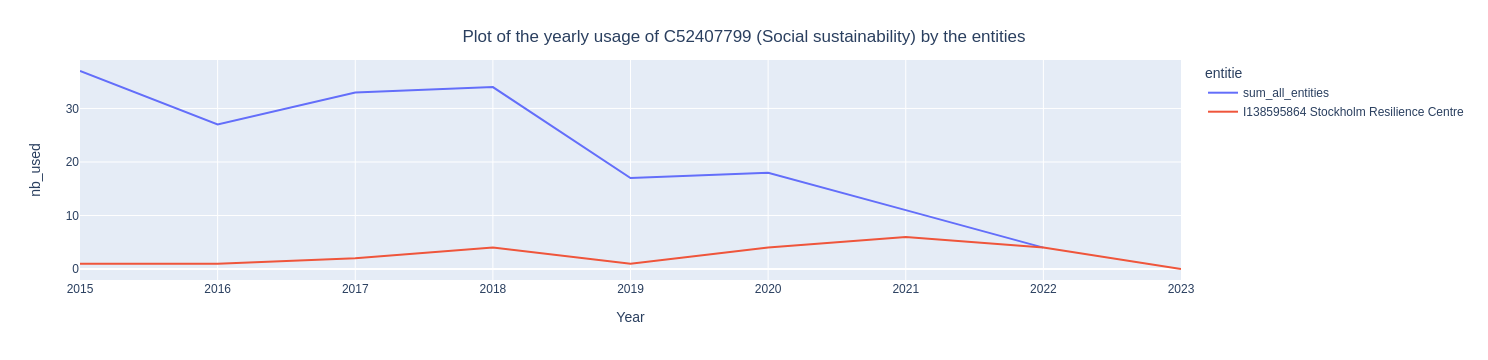

In [25]:
wplt.get_figure_time_series_element_used_by_entities(element = 'https://openalex.org/C52407799', y_datas = ['sum_all_entities', 'I138595864 Stockholm Resilience Centre'])#.write_image("sum_yearly_plot.pdf", width = 1000)